# Market Segmentation Exercise

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [2]:
data = pd.read_csv ('3.12. Example.csv')

**Background of data sample:** Self-reported satisfaction information from survey. Assesed from a scale of 1-10 (Not satisfied at all to Extremely satisfied, respectively); discrete variable. Brand loyalty is a lead score based off of proxies such as churn rate, retention rate, lifetime value (LTV), and purchase data (continuous data ranging from -2.5 to 2.5).

**Two Features:**
Satisfaction Score
Loyalty

In [3]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## Plot the Data

Text(0, 0.5, 'Loyalty')

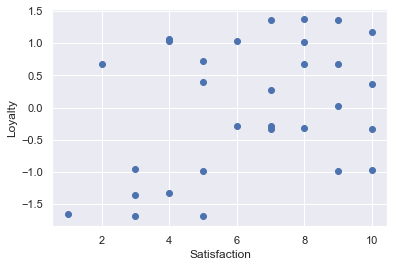

In [4]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

From initial first glance, it appears as though there are two clusters that could make sense from a purely visual standpoint. However when looking at the axes, it looks as if there can be 4 camps: Low Satisfication, High Loyalty; Low Satisfacftion, Low Loyalty; High Satisfaction, Low Loyalty; and High Satisfaction, High Loyalty.

## Select the features

In [5]:
x = data.copy()

## Clustering

In [9]:
kmeans = KMeans(2)
kmeans.fit(x).get_params()

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

## Clustering results

In [10]:
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'Loyalty')

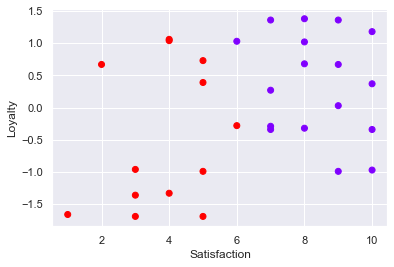

In [11]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

With two clusters, we can observe that the algorithm is more likely using the Satisfaction as a primary feature. Satisfaction and Loyalty appear to be equally important, so we will standardize Satisfication.

## Standardize the variables

**sklearn.preprocessing.scale(x):** scales (standardizes with mean 0, and standard deviation of 1 by default) each variable (feature/column) separately

In [12]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Take advantage of the Elbow method

In [15]:
wcss =[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.24718180592842,
 7.792695153937187,
 6.569489487091783,
 5.326631124753926,
 4.515084076379683,
 3.779988616205267]

Text(0, 0.5, 'WCSS')

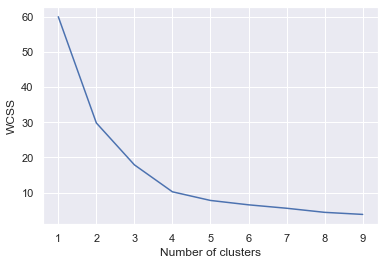

In [14]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Elbow Method

Limiation, we can see the change in the increase of clusters, but cannot pinpoint the best solution programmatically with this method.

## Explore clustering solutions and select the number of clusters

In [16]:
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


The clusters_new dataframe contains original values, but the cluster_pred column values are based on the standardized data. We will plot the data without standardizing the axes, but the solution will be the standardized one.

Text(0, 0.5, 'Loyalty')

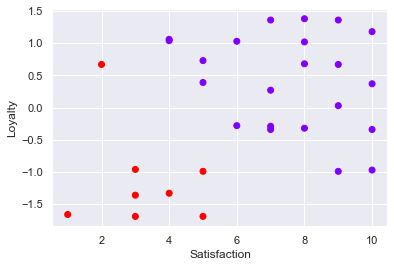

In [18]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

From 2 KMeans Clusters, we can label the red points as an "Aliented Customer Base" and the Purple as the "Everything Else Cluster." Going back to the Elbow WCSS plot, we will try out the other cluster numbers to see if we can arrive at a better split of labeled clusters. We have 3, 4, and 5 to try out:

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'Loyalty')

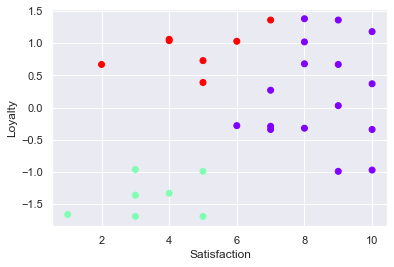

In [21]:
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

We still maintained the original "Alienated Cluster," But the "Everything Else" Cluster has been split in two: We can split the red cluster as a "Supporters" cluster as they have low satisfaction, but high loyalty (maybe a change is needed or a survey must be conducted with these types of users to see what improvements can be made). The purple cluster is still amorphous according to the axes so we will need to try a higher cluster number:

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'Loyalty')

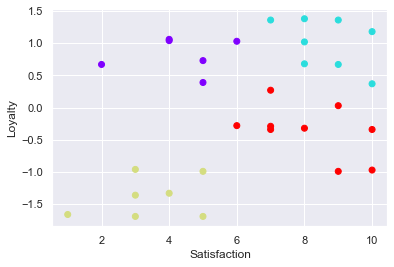

In [22]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In this 4 cluster solution, we still see the "Alienated" and "Supporter" Clusters and the Teal colored points can be labeled as "Fans" (The main customer base). The red cluster can be called "Roamers," as they have low loyalty, but are highly satisifed. Let us try to see the 5 clusters:

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'Loyalty')

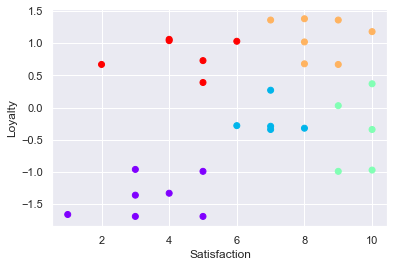

In [23]:
kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In this example, we notice that the Roamers group was split into two distinct groups: one group with less satisfaction and one with more, not adding that much value.

## Types of Analysis:

**Exploratory Data Analysis (EDA):**
1. Get acquainted with data
2. Search for patterns
3. Plan to investigate further. Clustering is used for this specifically

This includes data visualizations, descriptive statistics, and clustering to

**Confirmatory and Explanatory Analysis:**
1. Explain a phenomenon
2. Confirm a hypothesis
3. Validate previous research

Clustering can also be a confirmation of past beliefs.


## Conclusion

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'Loyalty')

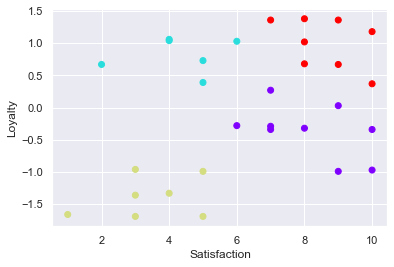

In [24]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

We have determined the cluster model has provided us with 4 clear clusters:

**Alienated: Low Loyalty; Low Satisfaction**

Alienated cluster may be folks who tried out a product or service once or twice and had a had experience or consistently bad experience. Alienated cluster populations could turn into Roamers if improvements are made to increase customer satisfaction "or delight." Doesnt make that much sense to address issues with Alienated groups first as they are already disinterested and unsatisfied.

**Supporters: High Loyalty; Low Satisfaction**

Supporters have High loyalty, but low satisfaction. There could be something about the experience as there are factors that are needed to optimize the process for providing the good or service. IE: if the lines at the store are long, it could be that the people experiencing low satisfaction do not like the wait times. Supporters have the capacity to move over to being fans if improvements are made.

**Fans: High Loyalty; High Satisfaction**

Retargeting them with similar ad campaign targeting would be great.

**Roamers: Low Loyalty; High Satisfaction**

May need to increase loyalty by providing such things as: loyalty programs, loyalty cards, raffles, discounts vouchers, etc. An unintended consequence of these actions could be that Roamers then become Supporters rather than Fans outright.

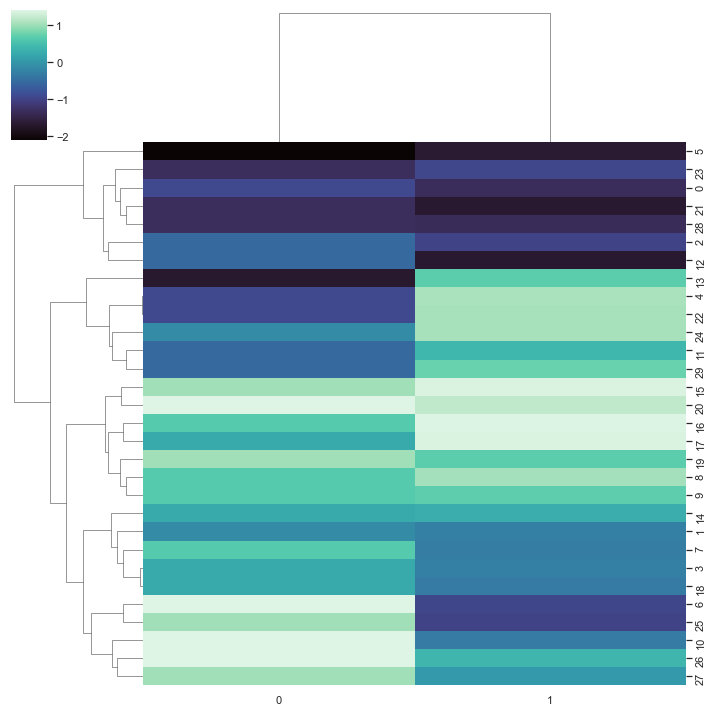

In [25]:
sns.clustermap(x_scaled, cmap='mako')